# Descripttion: 
This uses an artificial recurrent neyral network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60day stock price

In [2]:
# import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# get data
# data = pd.read_csv('./Processing_Historical_Data/Dow_Jones/AAPL.csv')
# data

In [3]:
# Extract data from my local machine

# Replace 'your_file_name.csv' with the actual name of your CSV file
file_name = 'AMZN'

# Construct the full file path by joining the directory path and the file name
file_path = 'D:\Programming\Stock Selections\Stock-Selection-Using-ML\Processing_Historical_Data\Dow_Jones' + '\\' + file_name +'.csv'

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# # Set the display options to show all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Display the DataFrame
print(data)


            Date    Open    High     Low   Close  Adj Close     Volume
0     2019-01-02   73.26   77.66   73.04   76.95      76.95  159662000
1     2019-01-03   76.00   76.90   74.85   75.01      75.01  139512000
2     2019-01-04   76.50   79.69   75.91   78.76      78.76  183652000
3     2019-01-07   80.11   81.72   79.45   81.47      81.47  159864000
4     2019-01-08   83.23   83.83   80.83   82.82      82.82  177628000
...          ...     ...     ...     ...     ...        ...        ...
1226  2023-11-14  145.00  147.25  144.67  145.80     145.80   56674600
1227  2023-11-15  147.05  147.28  142.58  143.19     143.19   63875700
1228  2023-11-16  140.91  143.32  139.52  142.83     142.83   49653500
1229  2023-11-17  142.66  145.22  142.53  145.17     145.17   49636700
1230  2023-11-20  145.13  146.63  144.72  146.13     146.13   41951200

[1231 rows x 7 columns]


Get the number of rows and column in the data set

In [8]:
data.shape


(1231, 7)

From this, we got to know that there are 1231 rows of data available and for each row, we have 7 different features or columns.

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03
mean,121.357677,122.780983,120.052348,121.486214,119.991690,1.027339e+08
std,45.822685,46.275568,45.385289,45.843097,46.094205,5.253438e+07
min,35.990000,36.430000,35.500000,35.540000,34.110000,3.145820e+07
25%,75.170000,76.075000,74.540000,75.735000,73.870000,6.904440e+07
50%,133.770000,135.000000,131.830000,133.500000,131.620000,8.911160e+07
75%,157.010000,159.330000,154.480000,157.245000,155.890000,1.202782e+08
max,196.240000,198.220000,195.270000,196.440000,195.920000,4.265100e+08


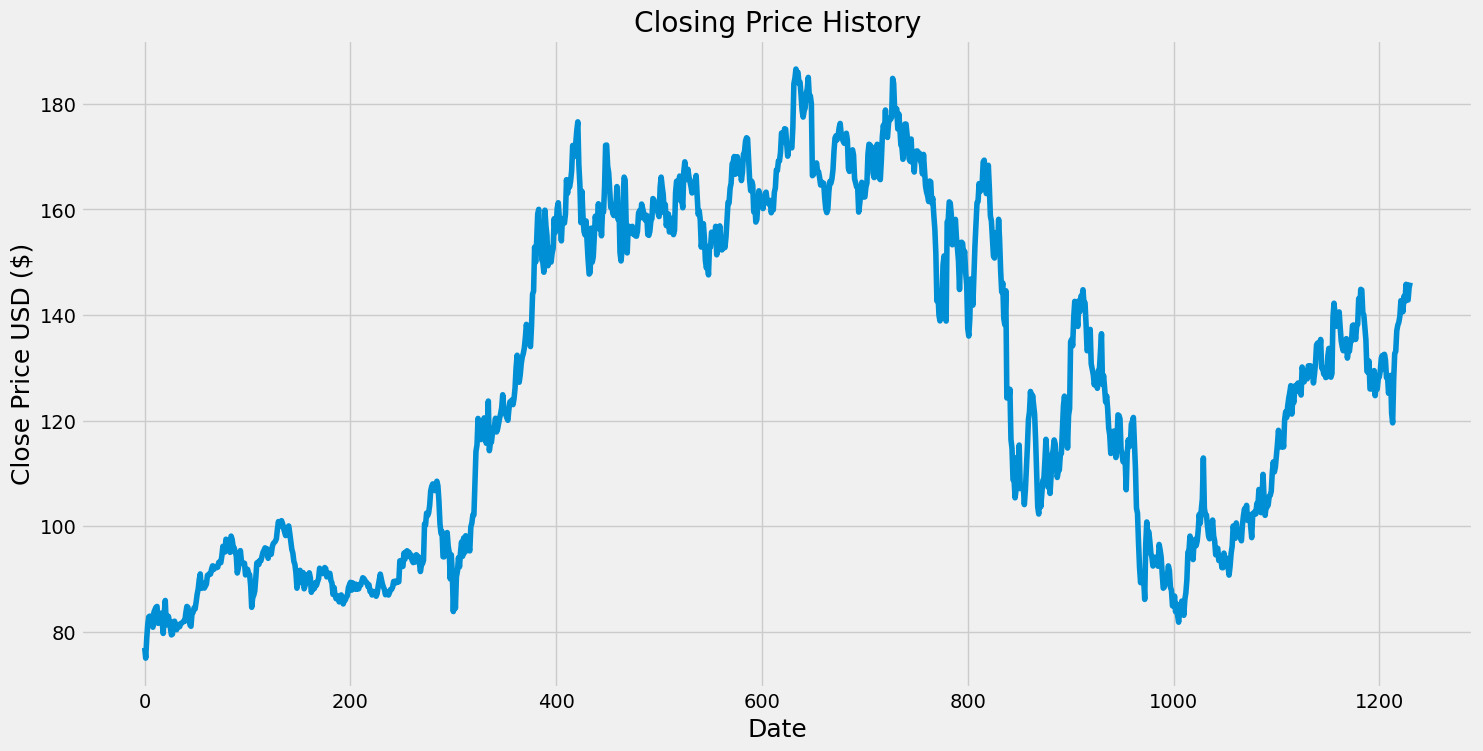

In [4]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Closing Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize= 18)
plt.show()

In [5]:
# Create a new dataframe with only the Close column
data = data.filter(['Close'])
# Convert the data frame to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

985

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01738975],
       [0.        ],
       [0.0336142 ],
       ...,
       [0.60792399],
       [0.62889925],
       [0.63750448]])

In [9]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01738975, 0.        , 0.0336142 , 0.05790606, 0.07000717,
       0.07135174, 0.06991753, 0.06283614, 0.05243815, 0.07807458,
       0.08219792, 0.08650054, 0.08775547, 0.05907135, 0.06265687,
       0.06929007, 0.07628182, 0.06167085, 0.04195052, 0.07628182,
       0.09788455, 0.05647185, 0.05960918, 0.07108283, 0.0627465 ,
       0.05109358, 0.03944066, 0.04069559, 0.06176049, 0.06265687,
       0.05485837, 0.04822517, 0.05700968, 0.05458946, 0.05342417,
       0.05880244, 0.05951954, 0.06095375, 0.06310506, 0.06256723,
       0.07681965, 0.08775547, 0.08614199, 0.07556472, 0.05629258,
       0.05405163, 0.07637146, 0.07744711, 0.08542488, 0.08336321,
       0.09501613, 0.10837218, 0.11724632, 0.13311223, 0.14297239,
       0.11850125, 0.12280387, 0.12701685, 0.11894944, 0.12244532])]
[0.1256722839727501]

[array([0.01738975, 0.        , 0.0336142 , 0.05790606, 0.07000717,
       0.07135174, 0.06991753, 0.06283614, 0.05243815, 0.07807458,
       0.08219792, 0.08650054, 0.087

In [10]:
# Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshape the data # show to -dimentional but LSTM allow 3-dimentional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(925, 60, 1)

In [15]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
# Compile the model

model.compile(optimizer='adam', loss= 'mean_squared_error')

In [17]:
# Train the model
model.fit(x_train, y_train, batch_size= 1, epochs= 1)

925/925 [==============================] - 22s 21ms/step - loss: 0.0057


In [18]:
# Lets create the testing data set
# Create a new array containg scaled values from index 925 to 1231
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_tests and y-test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [19]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [20]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 13ms/step


In [22]:
# Get the root mean squared error (RMSE)
rmse =np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

2.0303072226919765

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid ['predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date', )

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

While performing the EDA of a Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

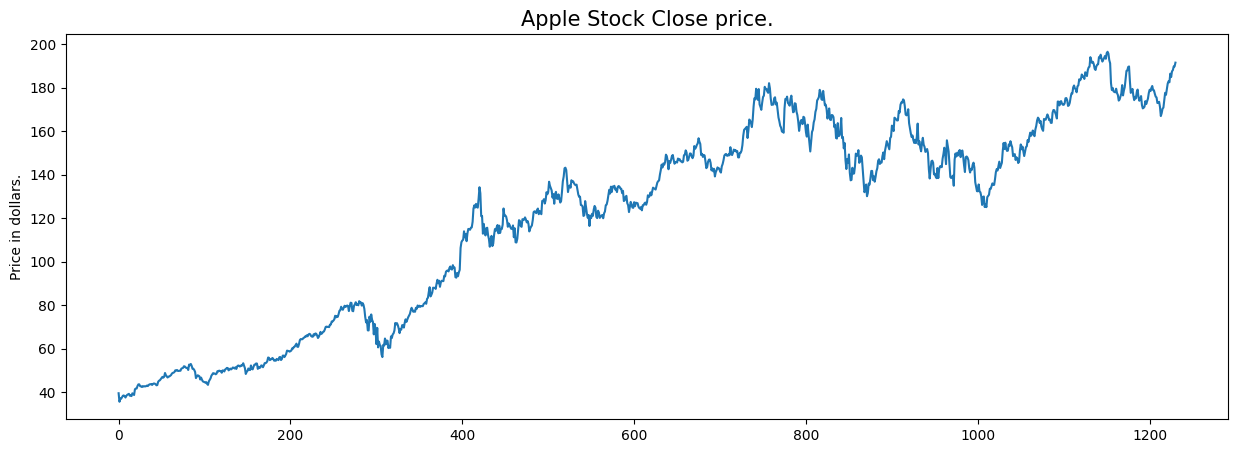

In [13]:
plt.figure(figsize=(15,5))

plt.plot(data['Close'])

plt.title('Apple Stock Close price.', fontsize=15)

plt.ylabel('Price in dollars.')
plt.show()

The prices of Apple stock are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [14]:
data.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.72,39.71,38.55,39.47,37.89,148158800
1,2019-01-03,35.99,36.43,35.50,35.54,34.11,365248800
2,2019-01-04,36.13,37.13,35.95,37.06,35.57,234428400
3,2019-01-07,37.17,37.20,36.47,36.98,35.49,219111200
4,2019-01-08,37.38,37.95,37.13,37.68,36.17,164101200
5,2019-01-09,37.82,38.63,37.40,38.32,36.78,180396400
6,2019-01-10,38.12,38.49,37.71,38.45,36.90,143122800
7,2019-01-11,38.22,38.42,37.87,38.07,36.54,108092800
8,2019-01-14,37.71,37.81,37.30,37.50,35.99,129756800
9,2019-01-15,37.56,38.34,37.51,38.26,36.72,114843600


In [15]:
data[data['Close'] == data['Adj Close']].shape

(7, 7)

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [25]:
data = data.drop(['Adj Close'], axis=1)

Now let’s draw the distribution plot for the continuous features given in the dataset.

Before moving further let’s check for the null values if any are present in the data frame.

In [16]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

This implies that there are no null values in the data set provided.

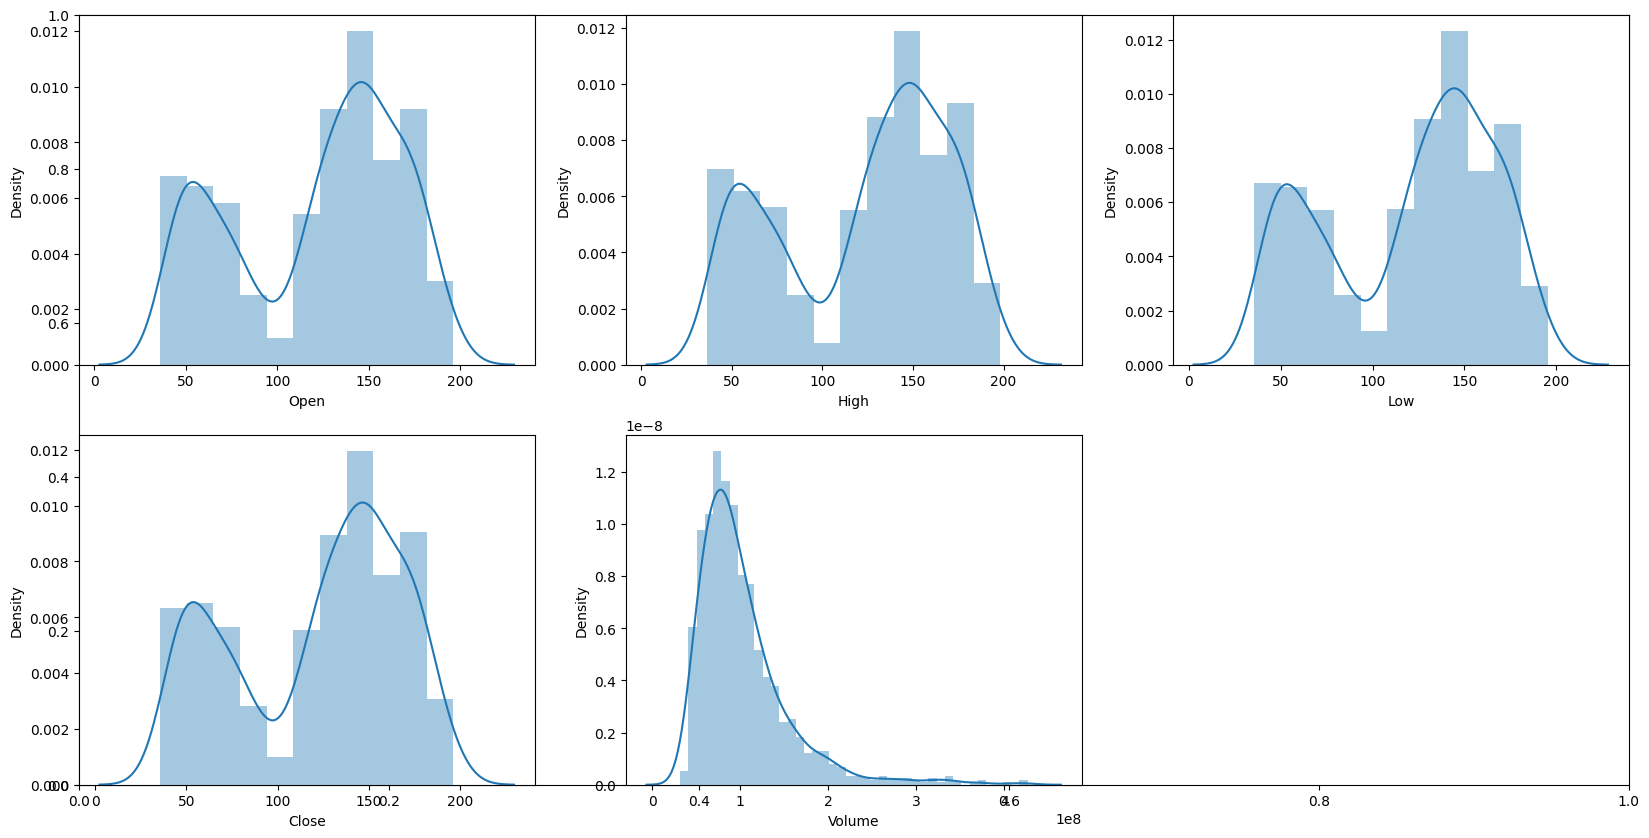

In [22]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 

plt.subplots(figsize=(20,10))
 

for i, col in enumerate(features):

  plt.subplot(2,3,i+1)

  sb.distplot(data[col])
plt.show()

In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

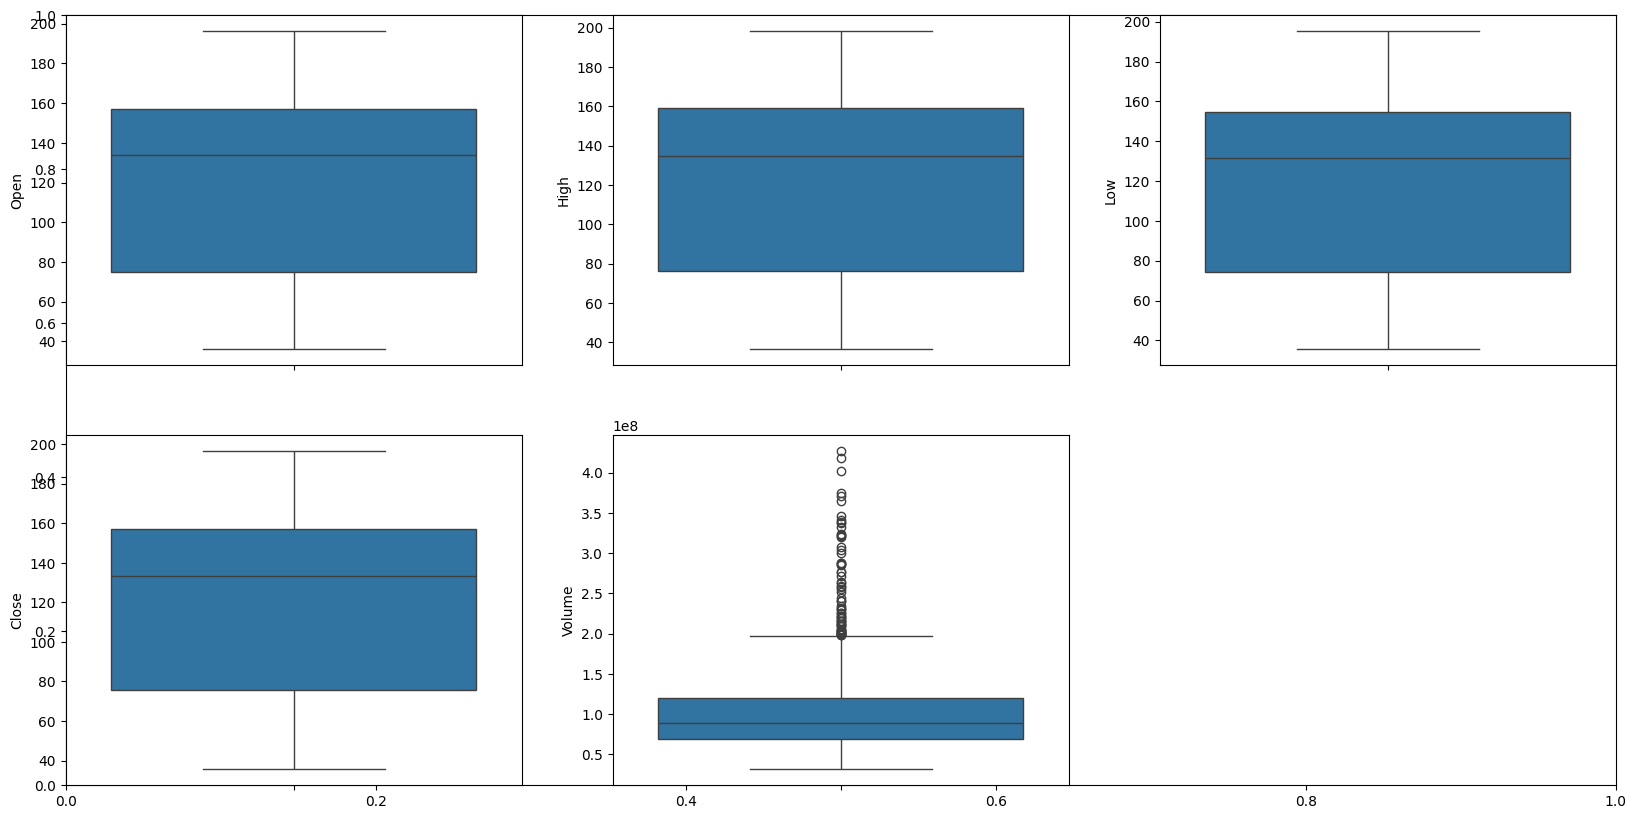

In [24]:
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):

  plt.subplot(2,3,i+1)

  sb.boxplot(data[col])
plt.show()

#Feature Engineering

Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [29]:
data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data.head()

KeyError: 'month'